#Logistic Regression in Practice

In this session, we shall apply logistic regression and look at predictions using it.

In [ ]:
#First, we import the required packages
import pandas as pd #the pandas library is useful for data processing
import numpy as np #numpy package will be useful for numerical computations
import matplotlib.pyplot as plt #the matplotlib library is useful for plotting purposes


# The following python directive helps to plot the graph in the notebook directly
%matplotlib inline

Now let us consider some open source data sets available in the internet.

In [ ]:
from sklearn.datasets import load_iris  #importing the load_iris class
iris_data = load_iris() #loading the iris dataset in iris_data

print(iris_data['DESCR']) #checking out the description of the dataset

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
X = iris_data['data'][:,:2]  ## we consider only first two attributes
print(X)

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]

In [ ]:
y = iris_data['target']
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
iris_data.target_names ## labels

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

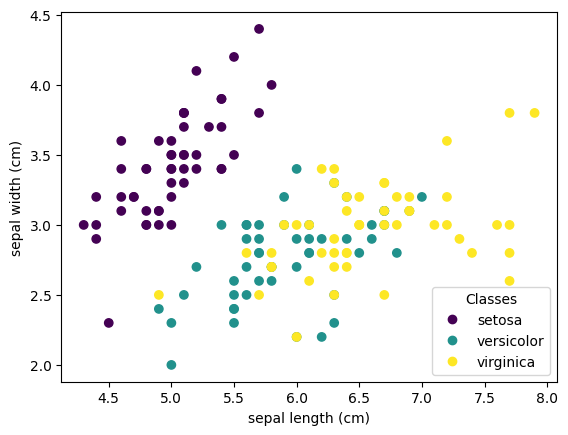

In [ ]:
## plot the dataset

fig, ax = plt.subplots()
scatter = plt.scatter(X[:,0], X[:,1], c= y)  ## scatter plot
ax.set(xlabel=iris_data.feature_names[0], ylabel=iris_data.feature_names[1]) ## set x and y labels
ax.legend(scatter.legend_elements()[0], iris_data.target_names, loc="lower right", title="Classes"); ## add legend

In [ ]:
# select setosa and versicolor classes, since we are doing binary classification

X = X[(y==0) | (y==1)]
y = y[(y==0) | (y==1)]

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

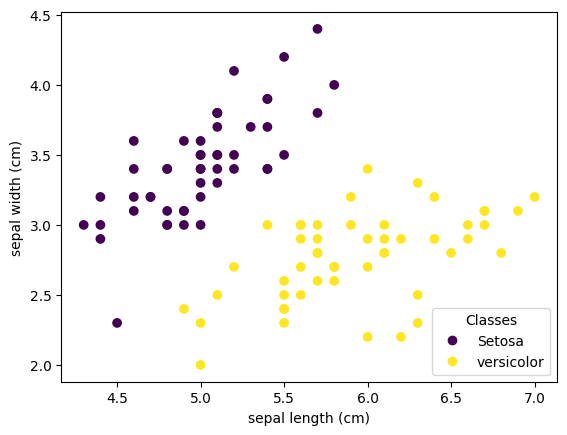

In [ ]:
## plot the dataset

fig, ax = plt.subplots()
scatter = plt.scatter(X[:,0], X[:,1], c= y)
ax.set(xlabel=iris_data.feature_names[0], ylabel=iris_data.feature_names[1])
ax.legend(scatter.legend_elements()[0], ['Setosa', 'versicolor'], loc="lower right", title="Classes");

In [ ]:
len(y),np.sum(y==1), np.sum(y==0)  ## class distribution

(100, 50, 50)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100, shuffle=True, stratify = y) ## split the data into train and test

print('Size of training set:', len(X_train))

print('Size of testing set:', len(X_test))

print('y train:')
print(y_train)
print('y test:')
print(y_test)

Size of training set: 70
Size of testing set: 30
y train:
[1 0 0 1 1 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0
 0 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0]
y test:
[0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1]


In [ ]:
len(y_train),np.sum(y_train==1), np.sum(y_train==0)  ## class distribution

(70, 35, 35)

In [ ]:
len(y_test),np.sum(y_test==1), np.sum(y_test==0)  ## class distribution

(30, 15, 15)

Assume that we have a random variable $X$ whose realization is $x$ a $d$-dimensional data:  
$
x=
\begin{bmatrix}
x_1 \\
x_2 \\
\vdots\\
x_d
\end{bmatrix}$.
Now we want to model the response variable $Y$ using logistic regression.

Recall that we use $E[Y|X=x] = p(x)$.

Also recall that we write $p(x)$ equivalently as:
$
p(x)=p(x;\beta_0,\beta_1,\ldots,\beta_d) = \frac{1}{1+e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_d x_d)}}.
$

If we denote $p(x)$ simply as $p$ and if we have the notations $\mathbf{x}=\begin{bmatrix}
x \\ 1
\end{bmatrix} = \begin{bmatrix}
x_1 \\ x_2 \\ \vdots \\ x_d \\ 1
\end{bmatrix}, \beta=\begin{bmatrix}
\beta_1 \\ \beta_2 \\ \vdots \\ \beta_d \\ \beta_0
\end{bmatrix}$
then we can write:

$
\begin{align}
p = \frac{1}{1+e^{-\beta^\top \mathbf{x}}}.
\end{align}
$

We also derived that

$
\begin{align}
\beta^\top \mathbf{x} &= \ln \frac{p}{1-p} \\
\implies \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_d x_d &= \ln \frac{p}{1-p}.
\end{align}
$

Thus, even if we did not have a straightforward dependence of $Y$ on an observation $x$ of $X$ as a linear relation, we see that the linear relation $\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_d x_d $ is related to the probability $p$ using:

$
\ln\frac{p}{1-p}=\beta^\top \mathbf{x}.
$

Note that the ratio $\frac{p}{1-p}$ is called $\textbf{odds}$ that the event $Y=1$ occurs, and hence $\ln \frac{p}{1-p}$ denotes the $\textbf{log odds}$.

More popularly, the log odds $\ln \frac{p}{1-p}$ is called the $\textbf{logit}$ function.


$\Large{\text{Likelihood function}}$

We defined a quantity useful in the estimation of the parameters $\beta$ used to model $p$.


Given an observation $X=x=\begin{bmatrix}
x_1 \\ x_2 \\ \vdots \\ x_d
\end{bmatrix}$
we define the $\textbf{likelihood function}$ as:

$
L(y;p) = p^y(1-p)^{(1-y)}
$

where recall that $p=p(x)=p(x;\beta)=\frac{1}{1+e^{-\beta^\top {\mathbf{x}}}}$. Note that likelihood function is simply an equivalent way to represent $P[Y=y]$, when $Y$ is assumed to be Bernoulli random variable.

Then observe that the natural goal is to maximize the likelihood function with respect to parameters $\beta$.

Now given a data set $D$ containing $n$ observations of the form $\{({x}^1,y^1), ({x}^2,y^2), \ldots, ({x}^n,y^n)\}$, and assuming that the pairs $({x}^i,y^i)$ are independent observations, then it is possible to extend the likelihood function as:

$
\begin{align}
L(y^1,\ldots,y^n;p^1,\ldots,p^n) = \Pi_{i=1}^{n} {(p^i)}^{y^i}(1-p^i)^{(1-y^i)}.
\end{align}
$

We can now write the $\textbf{log likelihood}$ function as:

$
\begin{align}
\ln L(y^1,\ldots,y^n;p^1,\ldots,p^n) = \sum_{i=1}^{n} y^i \ln {(p^i)} + (1-y^i) \ln (1-p^i).
\end{align}
$

Since natural log function is monotonic, maximizing the likelihood function is equivalent to maximizing the log likelihood function.

Hence the concerned optimization problem is:

$
\max_{\beta} \ln L(y^1,\ldots,y^n;p^1;\ldots,p^n)= \sum_{i=1}^{n} y^i \ln {(p^i)} + (1-y^i) \ln (1-p^i).
$

Note that $p^i = p(x^i) = p(x^i; \beta) = \frac{1}{1+e^{-{\beta^\top\mathbf{x}}}}, \forall i = 1,\ldots,n$.



$\Large{\text{Solving the likelihood maximization problem}}:$

To solve

$
\max_{\beta} \ln L(y^1,\ldots,y^n;p^1;\ldots,p^n)= \sum_{i=1}^{n} y^i \ln {(p^i)} + (1-y^i) \ln (1-p^i).
$

we can find the gradient of the objective function with respect to $\beta$ as:

$
\begin{align}
\nabla_\beta {\ln L} =  \begin{bmatrix}
\frac{\partial{ \ln L }} {\partial \beta_1} \\
\frac{\partial{ \ln L }} {\partial \beta_2} \\
\vdots \\
\frac{\partial{ \ln L }} {\partial \beta_d} \\
\frac{\partial{ \ln L }} {\partial \beta_0}
\end{bmatrix}
&= \sum_{i=1}^{n} \frac{y^i}{p^i} \nabla_\beta  p^i + \frac{(1-y^i)}{(1-p^i)} \nabla_\beta (1-p^i) \\
&= \sum_{i=1}^{n} \frac{y^i}{p^i} \nabla_\beta  p^i - \frac{(1-y^i)}{(1-p^i)} \nabla_\beta p^i
\end{align}
$

where $\nabla_\beta  p^i = \nabla_\beta  \left ( \frac{1}{1+e^{-\beta^\top {\mathbf{x}}^i}}\right )$.

Note that $\nabla_\beta p^i$ can be computed as:
$
\begin{align}
\nabla_\beta p^i = \nabla_\beta \frac{1}{1+e^{-\beta^\top {\mathbf{x}}^i}} =
\frac{e^{-\beta^\top {\mathbf{x}}^i}} {(1+e^{-\beta^\top {\mathbf{x}}^i})^2}
{\mathbf{x}}^i=
\left (\frac{1}{1+e^{-\beta^\top {\mathbf{x}}^i}}\right ) \left (\frac{e^{-\beta^\top {\mathbf{x}}^i}}{1+e^{-\beta^\top {\mathbf{x}}^i}}\right ) {\mathbf{x}}^i =   
p^i(1-p^i) {\mathbf{x}}^i
\end{align}
$

Thus we have

$
\begin{align}
\nabla_\beta {\ln L} &= \sum_{i=1}^{n} \frac{y^i}{p^i} \nabla_\beta  p^i - \frac{(1-y^i)}{(1-p^i)} \nabla_\beta p^i  \\
&=  \sum_{i=1}^{n} \frac{y^i}{p^i} p^i(1-p^i){\mathbf{x}}^i - \frac{(1-y^i)}{(1-p^i)} p^i(1-p^i){\mathbf{x}}^i \\
&= \sum_{i=1}^{n} \left(y^i (1-p^i) - (1-y^i) p^i\right ){\mathbf{x}}^i\\
&= \sum_{i=1}^{n} \left(y^i - y^ i p^i - p^i + y^i p^i\right ){\mathbf{x}}^i \\
&= \sum_{i=1}^{n} \left(y^i - p^i \right ){\mathbf{x}}^i
\end{align}
$

Letting $\nabla_\beta \ln L = 0$ will lead to system of non-linear equations which is generally difficult to solve to obtain closed form expression.

Hence we generally adopt an iterative procedure as follows to find the optimal $\beta$.

$\large{\text{Gradient ascent for solving the likelihood maximization problem}}:$

$
\begin{align}
&\textbf{Step 0:}  \text{Input data set $D$, tolerances $\epsilon_1, \epsilon_2$.} \\
&\textbf{Step 1:}  \text{Start with arbitrary $\beta$.} \\
&\textbf{Step 2:}  \text{For $k=1,2,\ldots$} \\
&\quad \quad \textbf{Step 2.1:} \text{Compute gradient $\nabla_\beta \ln L$}. \\
&\quad \quad \textbf{Step 2.2:}  \text{Compute step length $\eta$ using line search procedure} \\
&\quad \quad \textbf{Step 2.3:}  \beta = \beta + \eta \nabla_\beta \ln L \\
&\quad \quad \textbf{Step 2.4:}  \text{if $\|\nabla_{\beta} \ln L\|_2 \leq \epsilon_1$ break from loop} \\
&\quad \quad \textbf{Step 2.5:}  \text{if relative change in function value is $\leq \epsilon_2$ break from loop} \\
&\textbf{Step 3:}  \text{ Output $\beta_0$}
\end{align}
$

Note that $\nabla_{\beta} \ln L$ denotes the gradient of $\ln L$ with respect to $\beta$ given by:

$
\nabla_{\beta} \ln L = \begin{bmatrix}
\frac{\partial{ \ln L }} {\partial \beta_1}\\
\frac{\partial{ \ln L }} {\partial \beta_2} \\
\vdots \\
\frac{\partial{ \ln L }} {\partial \beta_d} \\
\frac{\partial{ \ln L }} {\partial \beta_0} \\
\end{bmatrix} = \sum_{i=1}^{n} \left(y^i -p^i \right ){\mathbf{x}}^i.
$

and $\eta$ denotes the learning rate.


$\large\text{Preparing the data matrix so that the last column is a column  of ones}$

In [ ]:
#add a column of ones
X_train = np.hstack((X_train,np.ones((X_train.shape[0],1))))
X_test = np.hstack((X_test,np.ones((X_test.shape[0],1))))
X_train

array([[6.6, 3. , 1. ],
       [5. , 3. , 1. ],
       [5.5, 4.2, 1. ],
       [4.9, 2.4, 1. ],
       [6.3, 2.3, 1. ],
       [6.1, 2.8, 1. ],
       [4.8, 3.4, 1. ],
       [4.8, 3. , 1. ],
       [5.5, 3.5, 1. ],
       [6.7, 3. , 1. ],
       [5.5, 2.6, 1. ],
       [4.4, 3. , 1. ],
       [6. , 3.4, 1. ],
       [5.2, 3.5, 1. ],
       [6.5, 2.8, 1. ],
       [5. , 3.3, 1. ],
       [6.9, 3.1, 1. ],
       [5.8, 2.7, 1. ],
       [4.9, 3. , 1. ],
       [5.6, 2.9, 1. ],
       [6.1, 2.8, 1. ],
       [6. , 2.7, 1. ],
       [5. , 3.6, 1. ],
       [5.8, 2.6, 1. ],
       [5.5, 2.4, 1. ],
       [6.4, 3.2, 1. ],
       [4.7, 3.2, 1. ],
       [5.9, 3. , 1. ],
       [5.4, 3.4, 1. ],
       [5.1, 3.5, 1. ],
       [4.6, 3.2, 1. ],
       [4.6, 3.6, 1. ],
       [4.8, 3. , 1. ],
       [5.2, 3.4, 1. ],
       [5.1, 3.5, 1. ],
       [5.6, 2.5, 1. ],
       [5.7, 3.8, 1. ],
       [5. , 3.4, 1. ],
       [6.3, 3.3, 1. ],
       [6.7, 3.1, 1. ],
       [6. , 2.9, 1. ],
       [5. , 3.2

$\Large{\text{Computing } \beta \text{ for the training data set}}:$

In [ ]:
#computing log likelihood function
def log_likelihood(beta):
  log_likelihood = 0.0
  ## iterating over each sample in train data
  for i in range(len(X_train)):
    x_i = X_train[i] #access i-th feature row
    y_i = float(y_train[i]) #access i-th label
    p_i = 1.0/(1.0+np.exp(-np.dot(beta, x_i))) #probability with the current beta

    p_i = np.clip(p_i, 1e-15, 1 - 1e-15)  ## limit the value of p_i between 1e-15 and 1-1e-15
    log_likelihood += y_i * np.log(p_i) + (1.0 - y_i) * np.log(1 - p_i)

  return log_likelihood

In [ ]:
#computing gradient of objective function with respect to beta
def compute_gradient(beta):
  gradient = np.zeros(X_train.shape[1])
  ## iterating over each sample in train data
  for i in range(len(X_train)):
    x_i = X_train[i] #access i-th feature row
    y_i = float(y_train[i]) #access i-th label
    p_i = 1.0/(1.0+np.exp(-np.dot(beta, x_i))) #probability with the current beta
    gradient = np.add(gradient,(y_i -p_i)*x_i)
  return gradient

In [ ]:
#cross-check compute_gradient and log_likelihood functions
beta = np.zeros(X_train.shape[1])  ## initialize beta = [0,0,....0]
print('X_train[0]:',X_train[0])
print('beta:',beta)

print('log likelihood:',log_likelihood(beta))
print('gradient:',compute_gradient(beta))

X_train[0]: [6.6 3.  1. ]
beta: [0. 0. 0.]
log likelihood: -48.520302639196174
gradient: [ 17.4 -11.2   0. ]


In [ ]:
def linesearch(beta, grad,lr=0.9):
  ## this function helps to find proper learning rate so that the function value is increase
  f_current = log_likelihood(beta)

  # update beta
  beta_new = np.add(beta, lr*grad)

  f_new = log_likelihood(beta_new)

  while f_new<f_current:
    lr = lr/2
    # update beta
    beta_new = np.add(beta, lr*grad)

    f_new = log_likelihood(beta_new)


  return lr



Initial values: beta: [0. 0. 0.]  log likelihood: -48.520302639196174
k:  0  beta: [ 0.12234375 -0.07875     0.        ]  grad norm: 20.692993983471794 log likelihood: -47.172241092949
k:  100  beta: [ 2.27727672 -3.72465009 -0.40405364]  grad norm: 18.20171099983081 log likelihood: -10.188421906078899
k:  200  beta: [ 3.60113153 -5.9500466  -0.7621396 ]  grad norm: 6.225655482013899 log likelihood: -4.703589870761087
k:  300  beta: [ 4.46059754 -7.39856511 -1.07311369]  grad norm: 0.9171477053489338 log likelihood: -3.0584882627423515
k:  400  beta: [ 5.55590052 -9.1333428  -1.54775586]  grad norm: 0.9659714697364268 log likelihood: -1.9812448541341672
k:  500  beta: [  6.2340144  -10.19797475  -1.90583776]  grad norm: 0.5791290510981056 log likelihood: -1.5506867277158312
k:  600  beta: [  7.2554849  -11.7114187   -2.50959882]  grad norm: 0.9746015892188358 log likelihood: -1.1290397432076502
k:  700  beta: [  7.84562636 -12.62451753  -2.92733292]  grad norm: 0.19818419164675088 log 

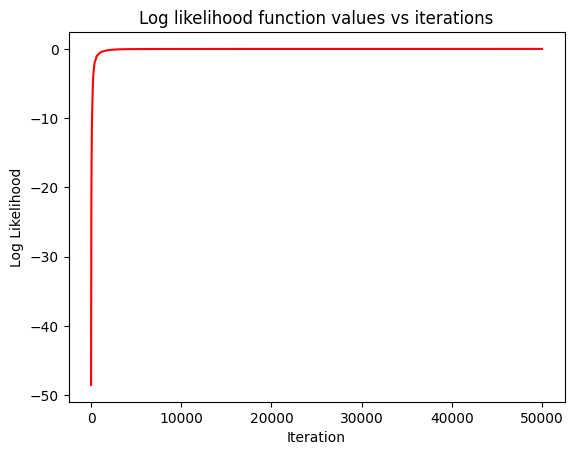

In [ ]:
#gradient ascent for likelihood maximization

beta = np.zeros(X_train.shape[1])  ## initialize beta = [0,0,....0]

## stopping criteria
# 1. maximum iteration
max_iter = 50000

# 2. tolerance
eps_1 = 1e-5 #tolerance for gradient norm
eps_2 = 1e-10 #tolerance for relative function value difference

#----#

## compute log likelihood
f_val = log_likelihood(beta)

#store the objective function values for plotting purposes
f_val_list = []
f_val_list.append(f_val)



print('Initial values: beta:', beta, ' log likelihood:', f_val)


# training loop
for k in range(max_iter):

  #compute gradient of objective function with respect to beta
  grad_beta = compute_gradient(beta)

  # learning rate
  lr = linesearch(beta=beta,grad=grad_beta)

  # update beta
  beta = np.add(beta, lr*grad_beta)

  grad_norm = np.linalg.norm(grad_beta) ## gradient norm

  f_val = log_likelihood(beta)  ## calculate log likelihood for new beta
  f_val_list.append(f_val)  ## append f_val to f_val_list

  ## checking stopping criteria
  rel_change_in_fval = np.abs((f_val - f_val_list[-2])/f_val_list[-2])

  if k%100 == 0:
    print('k: ', k,  ' beta:', beta, ' grad norm:', grad_norm, 'log likelihood:', f_val)

  ## checking stopping criteria
  if grad_norm <= eps_1:
    print('stopping criteria: gradient norm less than tolerance')
    break
  elif rel_change_in_fval <= eps_2:
    print('stopping criteria: relative change in objective function less than tolerance')
    break

if k== max_iter-1:
  print('stopping criteria: maximum iteration')
print('Final: k: ', k,  ' beta:', beta, ' grad norm:', grad_norm, 'log likelihood:', f_val)


#plot the function values during optimization
plt.plot( f_val_list, '-r', label='Log Likelihood values')
plt.title("Log likelihood function values vs iterations")
plt.xlabel("Iteration")
plt.ylabel("Log Likelihood")
plt.show()

In [ ]:
# prediction

def predict(beta, input):
  p = 1/ (1.0+ np.exp(-np.dot(beta, input)))  ## probability for y=1
  return 1 if p>=0.5 else 0

In [ ]:
## prediction
y_pred = []
for sample in X_test:
  y_pred.append(predict(beta,sample))

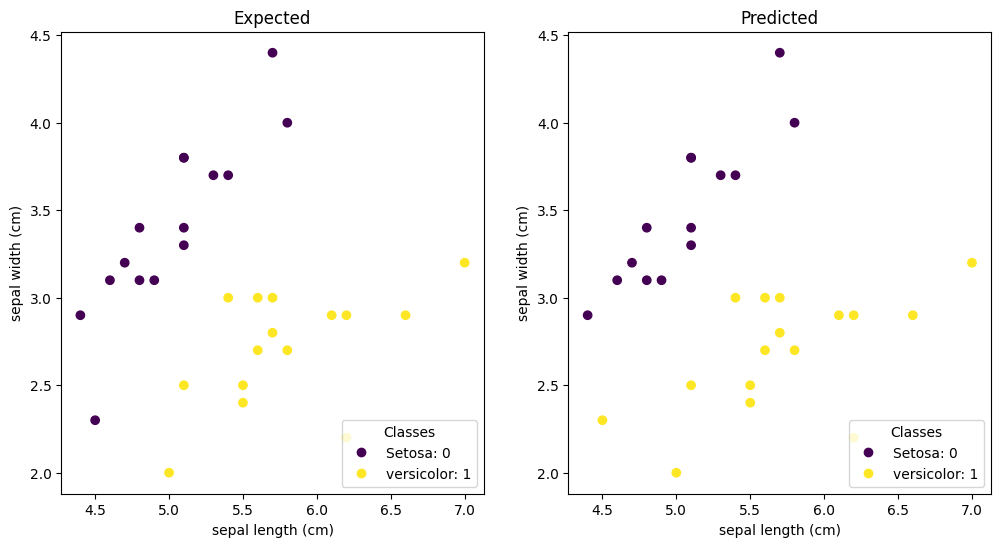

In [ ]:
## plot the dataset

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,6))
scatter = ax1.scatter(X_test[:,0], X_test[:,1], c= y_test)
ax1.set(xlabel=iris_data.feature_names[0], ylabel=iris_data.feature_names[1], title="Expected")
ax1.legend(scatter.legend_elements()[0], ['Setosa: 0', 'versicolor: 1'], loc="lower right", title="Classes")


scatter2 = ax2.scatter(X_test[:,0], X_test[:,1], c= y_pred)
ax2.set(xlabel=iris_data.feature_names[0], ylabel=iris_data.feature_names[1], title="Predicted")
ax2.legend(scatter2.legend_elements()[0], ['Setosa: 0', 'versicolor: 1'], loc="lower right", title="Classes");

## Metrics

In [ ]:
def Metrics(y_test, y_pred , accuracy_=True,confusion_matrix_ = False, precision_= False, recall_= False, F1_score_=False):
  ## convert list to numpy arrays
  y_test = np.array(y_test)
  y_pred = np.array(y_pred)

  output = []
  if accuracy_:
    accuracy = np.sum(y_test==y_pred)/ len(y_test) ## accuracy
    output.append(accuracy)


  ## positive predictions
  y_pred_1 = y_pred[y_pred==1]
  y_test_1 = y_test[y_pred==1]

  ## negative predictions
  y_pred_0 = y_pred[y_pred==0]
  y_test_0 = y_test[y_pred==0]

  TP = np.sum(y_pred_1==y_test_1)
  FP = len(y_pred_1) - TP  # len(y_pred_1) = total postive predictions
  TN = np.sum(y_pred_0==y_test_0)
  FN = len(y_pred_0) - TN  ## len(y_pred_0) = total negative predictions

  if confusion_matrix_:
    confusion_matrix = [[TN,FP],[FN,TP]]
    output.append(confusion_matrix)

  # precision = TP/ (TP+FP)
  if precision_:
    precision = TP/ (TP+FP)
    output.append(precision)

  # recall = TP/(TP+FN)
  if recall_:
    recall = TP/(TP+FN)
    output.append(recall)

  # f1_score = 2*precision*recall/(precision+recall)
  if F1_score_:
    f1_score = 2*precision*recall/(precision+recall)  ## harmonic mean of precision and recall
    output.append(f1_score)

  return output

In [ ]:
## calculate all the metrics
accuracy, confusion_matrix, precision, recall, F1_score = Metrics(y_test, y_pred, confusion_matrix_=True, precision_=True, recall_=True,F1_score_=True)

print('accuracy:', accuracy)
print('Confusion matrix:\n', confusion_matrix)
print("\nrecall:", recall)
print("precision:",precision)
print("F1 score:", F1_score)

accuracy: 0.9666666666666667
Confusion matrix:
 [[14, 1], [0, 15]]

recall: 1.0
precision: 0.9375
F1 score: 0.967741935483871


# Exercise

### Q. Implement regularized logistic regression for the same dataset